In [1]:
from mxnet import image
from mxnet import nd

In [3]:
data_shape = 256
batch_size = 8
rgb_mean = nd.array([123, 117, 104])

def get_iterators(data_shape, batch_size):
    class_name = ['pedestrian']
    num_class = len(class_name)
    train_iter = image.ImageDetIter(
        batch_size=batch_size,
        data_shape=(3, data_shape, data_shape),
        path_imgrec='./train.rec',
        path_imgidx='./train.idx',
        shuffle=True,
        mean=True,
        rand_crop=1,
        min_object_covered=0.95,
        max_attempts=200
    )
    return train_iter, class_name, num_class

In [4]:
train_data, class_name, num_class = get_iterators(data_shape, batch_size)

In [5]:
batch = train_data.next()
print(batch)

DataBatch: data shapes: [(8, 3, 256, 256)] label shapes: [(8, 12, 5)]


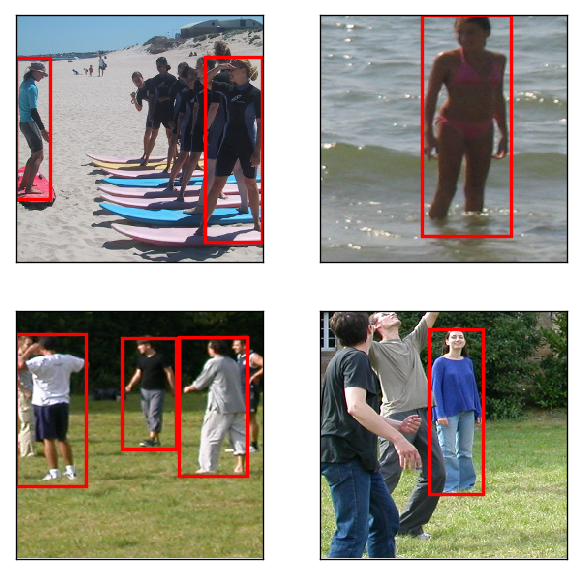

In [8]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def box_to_rect(box, color, linewidth=3):
    """convert an anchor box to a matplotlib rectangle"""
    box = box.asnumpy()
    return plt.Rectangle(
        (box[0], box[1]), box[2]-box[0], box[3]-box[1],
        fill=False, edgecolor=color, linewidth=linewidth)

_, figs = plt.subplots(2, 2, figsize=(6,6))
for i in range(2):
    for j in range(2):        
        img, labels = batch.data[0][3*i+j], batch.label[0][3*i+j]
        # (3L, 256L, 256L) => (256L, 256L, 3L)
        img = img.transpose((1, 2, 0)) + rgb_mean
        img = img.clip(0,255).asnumpy()/255
        fig = figs[i][j]
        fig.imshow(img)
        for label in labels:
            rect = box_to_rect(label[1:5]*data_shape,'red',2)
            fig.add_patch(rect)                    
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
plt.show()